# Tutorial 4: Visualizing Reconstructions and Exploring the Latent Space

In this tutorial, we analyze the behavior of the trained Conditional Variational Autoencoder (CVAE) by visualizing reconstructed images and probing the learned latent space.

While training loss provides a quantitative measure of performance, qualitative inspection is also important for understanding what the model has actually learned.

We will:

- Visualize original chest X-ray images alongside their reconstructions

- Examine how reconstruction quality varies across samples

- Explore how the latent space changes as we modify the conditional label

In [6]:
from google.colab import drive
drive.mount('/content/drive')

import sys
import os

import torch

REPO_PATH = "/content/drive/MyDrive/Colab Notebooks/VAE-Medical-Image-Gen-Tutorial"

# Change directory at the Python level (not IPython magic)
os.chdir(REPO_PATH)

# Add repo root to Python path
if REPO_PATH not in sys.path:
    sys.path.insert(0, REPO_PATH)

from model.cvae import CVAE

LATENT_DIM = 32
LABEL_DIM = 1
CHECKPOINT_PATH = "/content/drive/MyDrive/cvae_best2.pt"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CVAE(latent_dim=LATENT_DIM, label_dim=LABEL_DIM).to(device)
model.load_state_dict(torch.load(CHECKPOINT_PATH, map_location=device))
model.eval()

print("Model loaded successfully.")


Mounted at /content/drive
Model loaded successfully.


## Visualizing Reconstructions

To evaluate reconstruction quality, we compare the original input images with their corresponding reconstructions produced by the CVAE.

sending incremental file list
valid/
valid/patient64541/
valid/patient64541/study1/
valid/patient64541/study1/view1_frontal.jpg
valid/patient64542/
valid/patient64542/study1/
valid/patient64542/study1/view1_frontal.jpg
valid/patient64542/study1/view2_lateral.jpg
valid/patient64543/
valid/patient64543/study1/
valid/patient64543/study1/view1_frontal.jpg
valid/patient64544/
valid/patient64544/study1/
valid/patient64544/study1/view1_frontal.jpg
valid/patient64545/
valid/patient64545/study1/
valid/patient64545/study1/view1_frontal.jpg
valid/patient64546/
valid/patient64546/study1/
valid/patient64546/study1/view1_frontal.jpg
valid/patient64547/
valid/patient64547/study1/
valid/patient64547/study1/view1_frontal.jpg
valid/patient64547/study1/view2_frontal.jpg
valid/patient64547/study1/view3_lateral.jpg
valid/patient64548/
valid/patient64548/study1/
valid/patient64548/study1/view1_frontal.jpg
valid/patient64549/
valid/patient64549/study1/
valid/patient64549/study1/view1_frontal.jpg
valid/patien

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


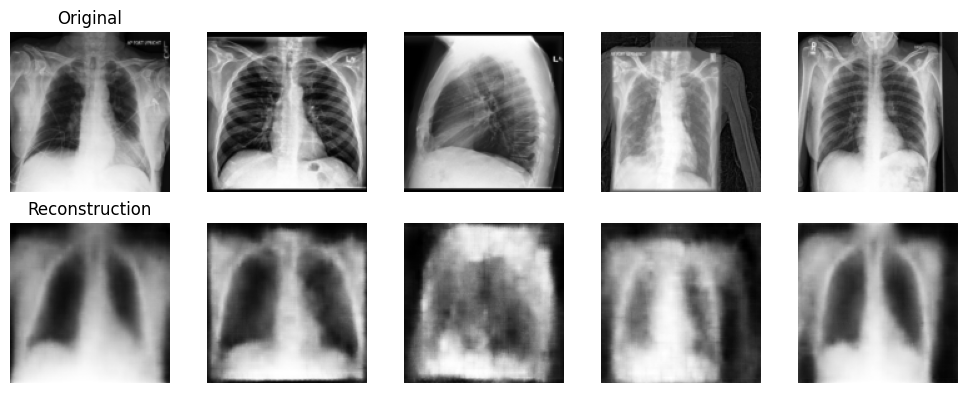

In [10]:
import matplotlib.pyplot as plt

from data.data_loader import get_chexpert_train_dataloader, get_chexpert_valid_dataloader
from configs.paths import GOOGLE_DRIVE_CHEXPERT_VALID_CSV, GOOGLE_DRIVE_CHEXPERT_VALID_DIR, CHEXPERT_VALID_CSV, DEFAULT_DATA_ROOT

!mkdir -p {CHEXPERT_VALID_DIR}
!rsync -avh --ignore-errors {GOOGLE_DRIVE_CHEXPERT_VALID_DIR} {DEFAULT_DATA_ROOT}
!rsync -avh --ignore-errors {GOOGLE_DRIVE_CHEXPERT_VALID_CSV} {DEFAULT_DATA_ROOT}

valid_loader = get_chexpert_valid_dataloader()

imgs, labels = next(iter(valid_loader))
imgs = imgs.to(device)
labels = labels.to(device)

with torch.no_grad():
    recon, _, _ = model(imgs, labels)

# Plot a few examples
n = 5
plt.figure(figsize=(10, 4))

for i in range(n):
    # Original
    plt.subplot(2, n, i + 1)
    plt.imshow(imgs[i][0], cmap="gray")
    plt.axis("off")
    if i == 0:
        plt.title("Original")

    # Reconstruction
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon[i][0], cmap="gray")
    plt.axis("off")
    if i == 0:
        plt.title("Reconstruction")

plt.tight_layout()
plt.show()